In [291]:
import numpy as np
import scipy.special as sp
from scipy.constants import physical_constants
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


La función radial describe el comportamiento del electrón en función de la distancia del núcleo, proporcionando un medio para visualizar la densidad de nubes de electrones a diferentes distancias del núcleo.

$$ R_{_{nl}}(r) = \sqrt{ \left(\frac{2}{na_0}\right)^{3} \frac{(n - l - 1)!}{2n(n + l)!} } \; e^{-\frac{r}{na_0}} \; \left( \frac{2r}{na_0} \right)^{l} \; L_{_{n-l-1}}^{^{2l+1}} \left( \frac{2r}{na_0} \right) $$

In [292]:
def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)
    constant_factor = (2 / (n**2)) * np.math.sqrt( np.math.factorial(n - l - 1) / np.math.factorial(n + l) / (a0**3) )

    return constant_factor * np.exp(-p / 2) * (p**l) * laguerre(p)

The angular function is described by spherical harmonics and is a function of the polar angle $\theta$ and the azimuthal angle $\varphi$. The angular function gives the shape and orientation of the atomic orbitals.

$$ Y_{_l}^{^m}(\theta, \varphi) = (-1)^m \sqrt{ \frac{2l+1}{4\pi} \; \frac{(l-m)!}{(l+m)!} } \; P_{_l}^{^m} (\cos \theta) \; e^{im\varphi} $$

In [309]:
def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))
    constant_factor = ((-1)**m) * np.math.sqrt( ((2 * l + 1) * np.math.factorial(l - np.absolute(m))**3) / (4 * np.math.pi * np.math.factorial(l + np.absolute(m))) )

    return constant_factor * legendre * np.exp(1.j * m * phi)

In [310]:
def compute_wavefunction(n, l, m, a0_scale_factor):
    a0 = a0_scale_factor * physical_constants['Bohr radius'][0] * 1e12

    grid_extend = 480
    grid_resolution = 680

    x = y = np.linspace(-grid_extend, grid_extend, grid_resolution)
    x, y = np.meshgrid(x, y)

    phi, theta = np.linspace(0, np.math.pi, 1240), np.linspace(0, 2*np.math.pi, 1240)
    phi, theta = np.meshgrid(phi, theta)

    eps = np.finfo(float).eps

    psi = radial_function(n, l, np.sqrt(x**2 + y**2), a0) * angular_function(m, l, np.arctan(x / (y + eps)), 0)
    psi_3d = angular_function(m, l, phi, theta)

    return psi

In [311]:
def compute_probability_density(psi):
    return np.abs(psi)**2

In [312]:
def CartSpherical():
    phi = np.linspace(0, 2* np.pi, 155)
    theta = np.linspace(0, np.pi, 155)
# meshgrid to generate points
    phi, theta = np.meshgrid(phi, theta)
    return theta,phi

In [313]:
def sphtocart(theta,phi,Y):
    x = np.sin(phi) * np.cos(theta) *abs(Y)
    y = np.sin(phi) * np.sin(theta) *abs(Y)
    z = np.cos(phi) *abs(Y)
    return x,y,z

In [314]:
# @title
from matplotlib.colors import Normalize
def plot_wf_probability_density(n, l, m, a0_scale_factor, dark_theme=False, color_palette='rocket'):
    # Color palette validation
    try:
        sns.color_palette(color_palette)
    except ValueError:
        raise ValueError(f'{color_palette} is not a recognized Seaborn color palette.')

    # Configure plot aesthetics using matplotlib rcParams settings
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.major.width'] = 4
    plt.rcParams['ytick.major.width'] = 4
    plt.rcParams['xtick.major.size'] = 15
    plt.rcParams['ytick.major.size'] = 15
    plt.rcParams['xtick.labelsize'] = 30
    plt.rcParams['ytick.labelsize'] = 30
    plt.rcParams['axes.linewidth'] = 4

    # Create a new figure with specified dimensions
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # fig, ax = plt.subplots(figsize=(16, 16.5))
    plt.subplots_adjust(top=0.82)
    plt.subplots_adjust(right=0.905)
    # plt.subplots_adjust(left=-0.1)

    theta,phi=CartSpherical()
    x,y,z=sphtocart(theta,phi,angular_function(m,l,theta,phi))
    # Compute and visualize the wavefunction probability density
    # - By taking the square root of the probability density we reduce the dynamic range
    #   of the visualization, spreading out the values and making the electron's presence
    #   in low and medium probability regions more distinguishable
    # Add a colorbar
    # Apply dark theme parameters
    if dark_theme:
        theme = 'dt'
        background_color = sorted(
            sns.color_palette(color_palette, n_colors=100),
            key=lambda color: 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]
        )[0]
        plt.rcParams['text.color'] = '#dfdfdf'
        title_color = '#dfdfdf'
        fig.patch.set_facecolor(background_color)
        cbar.outline.set_visible(False)
        ax.tick_params(axis='x', colors='#c4c4c4')
        ax.tick_params(axis='y', colors='#c4c4c4')
        for spine in ax.spines.values():
            spine.set_color('#c4c4c4')

    else:  # Apply light theme parameters
        theme = 'lt'
        plt.rcParams['text.color'] = '#000000'
        title_color = '#000000'
        ax.tick_params(axis='x', colors='#000000')
        ax.tick_params(axis='y', colors='#000000')

    # Save and display the plot
    # plt.savefig(f'({n},{l},{m})[{theme}].png')
    # plt.show()

    # Create a new figure - 3D
    # fig, ax = plt.subplots(figsize=(16, 16.5), subplot_kw={'projection': '3d'})
    
  # Calcular el módulo cuadrado de la función de onda angular
    angular_density = np.abs(angular_function(m, l, theta, phi)) ** 2

# Normalizar los valores de densidad de probabilidad
    norm = Normalize(vmin=np.min(angular_density), vmax=np.max(angular_density))

# Obtener colores normalizados para cada punto
    colors = cm.jet(norm(angular_density))
    ax.set_aspect('equal')
    ax.plot_surface(x, y, z, linewidth = 0.5, facecolors=colors,cmap='jet',alpha=0.5)
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    # ax.set_zlim(-1, 1)
    # plt.savefig(f'({n},{l},{m})[{theme}].png')
    plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8832\1113021823.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(25, 20))


<IPython.core.display.Javascript object>


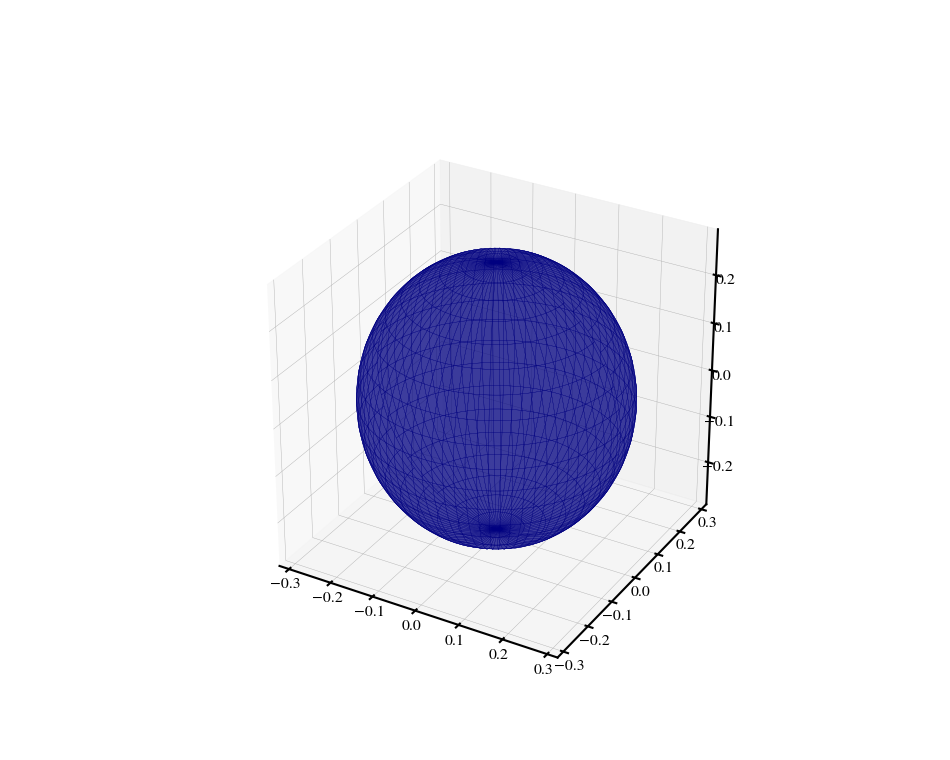

In [315]:
#@title

import ipywidgets as widgets
from IPython.display import display

plt.rcParams['figure.dpi'] = 38

def set_l_aqn(_):
    l_aqn.options = [i for i in range(0, n_pqn.value, 1)]
    l_aqn.value = 0

def set_m_mqn(_):
    m_mqn.options = [i for i in range(-l_aqn.value, l_aqn.value+1, 1)]
    m_mqn.value = 0

def on_button_clicked(b):
    output.clear_output()
    with output:
        plot_wf_probability_density(
            n_pqn.value,
            l_aqn.value,
            m_mqn.value,
            a0_scale_factor.value,
            False,
            'magma'
        )

n_pqn = widgets.Dropdown(
    options = [i for i in range(1, 11, 1)],
    value = 1,
    description = 'n:',
    disabled = False
)
l_aqn = widgets.Dropdown(
    options = [0],
    value = 0,
    description = 'l:',
    disabled = False
)
m_mqn = widgets.Dropdown(
    options = [0],
    value = 0,
    description = 'm:',
    disabled = False
)
a0_scale_factor = widgets.FloatSlider(
    value = 1.0,
    min = 0.01,
    max = 2.0,
    step = 0.01,
    description = 'a0',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

button = widgets.Button(description='Plot')
output = widgets.Output(layout = widgets.Layout())

n_pqn.observe(set_l_aqn)
l_aqn.observe(set_m_mqn)

display(n_pqn)
display(l_aqn)
display(m_mqn)
display(a0_scale_factor)

button.on_click(on_button_clicked)

display(button, output)